#### Steps:
- import packages needed and import datasets
- check basic structure of the data
- spliting feature attributes and target class to X and Y
- apply standard normalization on data points
- apply PCA
- apply feature selection
- write knn algorithm, pick k value
- wirte k-fold cross validation, pick k value
- calculate accuracy
- perform k-fold cross validation k times and get average accuracy

In [1]:
# set up the packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# for normalizing the scale of the data
from sklearn.preprocessing import StandardScaler
# for picking principle components
from sklearn.decomposition import PCA
# for dropping feature with low variance
from sklearn.feature_selection import VarianceThreshold

In [2]:
# import training data
student_training_data = pd.read_csv('training.csv')
student_training_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,4.0,7.0,1.0,9147.0,1.0,3.0,130.0,1.0,19.0,1.0,...,0.0,5.0,5.0,0.0,0.000000,0.0,11.1,0.6,2.02,1.0
1,1.0,39.0,1.0,9085.0,1.0,1.0,130.0,1.0,37.0,37.0,...,0.0,6.0,14.0,2.0,11.333333,0.0,11.1,0.6,2.02,2.0
2,1.0,1.0,6.0,9070.0,1.0,6.0,119.0,1.0,1.0,1.0,...,0.0,6.0,8.0,6.0,13.625000,0.0,10.8,1.4,1.74,3.0
3,2.0,39.0,1.0,9238.0,1.0,19.0,133.1,1.0,37.0,37.0,...,0.0,6.0,0.0,0.0,0.000000,0.0,15.5,2.8,-4.06,1.0
4,1.0,1.0,3.0,9500.0,1.0,1.0,142.0,1.0,37.0,38.0,...,0.0,7.0,7.0,6.0,13.900000,0.0,7.6,2.6,0.32,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,1.0,1.0,2.0,9070.0,1.0,1.0,134.0,1.0,1.0,19.0,...,0.0,6.0,11.0,4.0,11.333333,0.0,13.9,-0.3,0.79,1.0
3535,1.0,1.0,1.0,9853.0,1.0,1.0,133.0,1.0,1.0,38.0,...,4.0,8.0,8.0,8.0,12.625000,0.0,15.5,2.8,-4.06,2.0
3536,1.0,1.0,1.0,8014.0,0.0,1.0,100.0,1.0,38.0,19.0,...,0.0,6.0,6.0,6.0,12.500000,0.0,12.7,3.7,-1.70,3.0
3537,1.0,1.0,4.0,9238.0,1.0,1.0,127.0,1.0,1.0,38.0,...,0.0,6.0,7.0,6.0,13.428571,0.0,11.1,0.6,2.02,3.0


In [3]:
# import test data
student_test_data = pd.read_csv('test.csv')
student_test_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,4.0,39.0,1.0,9130.0,1.0,1.0,133.1,1.0,3.0,1.0,...,0.0,0.0,6.0,16.0,1.0,10.000000,0.0,11.1,0.6,2.02
1,1.0,17.0,1.0,9238.0,1.0,1.0,125.0,1.0,4.0,3.0,...,0.0,0.0,6.0,8.0,6.0,12.142857,0.0,16.2,0.3,-0.92
2,1.0,17.0,1.0,9853.0,1.0,1.0,133.0,1.0,38.0,38.0,...,0.0,0.0,7.0,7.0,7.0,12.285714,0.0,16.2,0.3,-0.92
3,1.0,17.0,2.0,9670.0,1.0,1.0,110.0,1.0,1.0,1.0,...,0.0,0.0,6.0,8.0,5.0,13.000000,0.0,15.5,2.8,-4.06
4,1.0,39.0,1.0,9500.0,1.0,1.0,130.0,1.0,37.0,19.0,...,0.0,0.0,7.0,14.0,0.0,0.000000,0.0,11.1,0.6,2.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1.0,1.0,4.0,9500.0,1.0,1.0,136.0,1.0,19.0,38.0,...,0.0,0.0,8.0,8.0,7.0,14.328571,0.0,10.8,1.4,1.74
881,2.0,7.0,1.0,8014.0,0.0,3.0,130.0,1.0,35.0,35.0,...,0.0,8.0,8.0,8.0,8.0,12.875000,0.0,10.8,1.4,1.74
882,1.0,17.0,1.0,9254.0,1.0,1.0,122.0,1.0,19.0,19.0,...,0.0,0.0,6.0,6.0,6.0,10.500000,0.0,12.4,0.5,1.79
883,1.0,1.0,2.0,9500.0,1.0,1.0,130.0,1.0,1.0,38.0,...,0.0,0.0,8.0,11.0,6.0,12.875000,0.0,11.1,0.6,2.02


In [4]:
# check training data types, columns, total entries
student_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3539 non-null   float64
 1   Application mode                                3539 non-null   float64
 2   Application order                               3539 non-null   float64
 3   Course                                          3539 non-null   float64
 4   Daytime/evening attendance	                     3539 non-null   float64
 5   Previous qualification                          3539 non-null   float64
 6   Previous qualification (grade)                  3539 non-null   float64
 7   Nationality                                     3539 non-null   float64
 8   Mother's qualification                          3539 non-null   float64
 9   Father's qualification                   

In [5]:
# check test data types, columns, total entries
student_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  885 non-null    float64
 1   Application mode                                885 non-null    float64
 2   Application order                               885 non-null    float64
 3   Course                                          885 non-null    float64
 4   Daytime/evening attendance	                     885 non-null    float64
 5   Previous qualification                          885 non-null    float64
 6   Previous qualification (grade)                  885 non-null    float64
 7   Nationality                                     885 non-null    float64
 8   Mother's qualification                          885 non-null    float64
 9   Father's qualification                     

In [6]:
# check if there is any null data in training set
student_training_data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [7]:
# check if there is any null data in testing set
student_test_data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [8]:
# check the summary statistics in each attribute in training set
student_training_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,...,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,1.174626,18.744278,1.734671,8836.128850,0.886126,4.458604,132.649392,1.840633,19.359989,22.334558,...,0.524724,6.181407,8.021475,4.428087,10.227644,0.144956,11.563182,1.236253,0.008918,2.193840
std,0.592511,17.440682,1.317990,2096.231351,0.317703,10.059443,13.239906,6.711661,15.574212,15.324693,...,1.858519,2.187607,3.954674,2.983109,5.212690,0.739088,2.669147,1.379311,2.273285,0.883718
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,1.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.800000,0.000000,9.400000,0.300000,-1.700000,1.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,3.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,3.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,43.000000,44.000000,...,18.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,3.000000


In [9]:
# check the summary statistics in each attribute in test set
student_test_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,...,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,1.194350,18.368362,1.700565,8938.674576,0.909605,5.054237,132.469040,2.003390,20.369492,22.038418,...,0.160452,0.610169,6.435028,8.230508,4.466667,10.240449,0.171751,11.577966,1.195141,-0.025819
std,0.656133,17.666273,1.297252,1926.363515,0.286910,10.815053,12.986442,7.675031,15.701406,15.422947,...,0.737809,2.141623,2.218677,3.918713,3.139708,5.206205,0.809931,2.644032,1.396525,2.257558
min,1.000000,1.000000,1.000000,33.000000,0.000000,1.000000,100.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,6.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.000000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,0.600000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.428571,0.000000,12.700000,2.600000,1.790000
max,6.000000,53.000000,6.000000,9991.000000,1.000000,43.000000,180.000000,105.000000,44.000000,40.000000,...,8.000000,19.000000,23.000000,28.000000,20.000000,17.600000,8.000000,16.200000,3.700000,3.510000


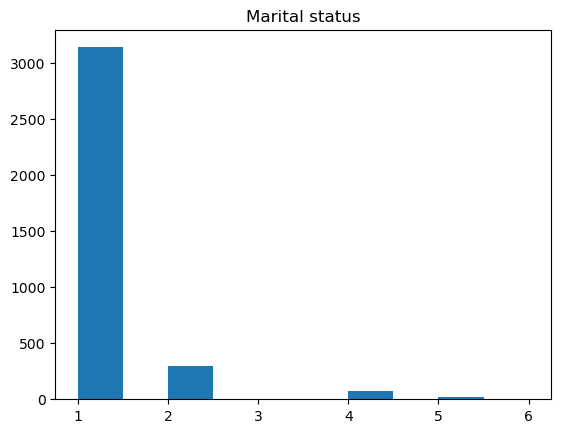

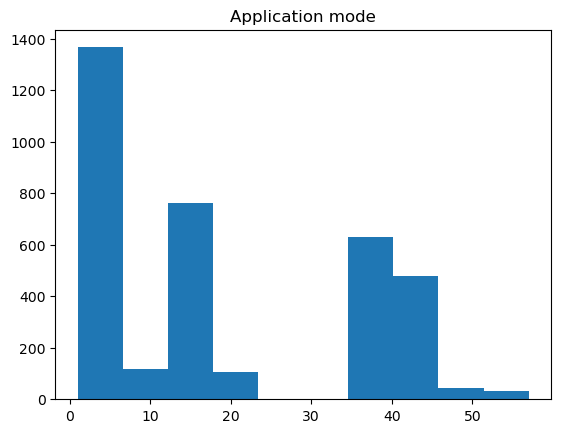

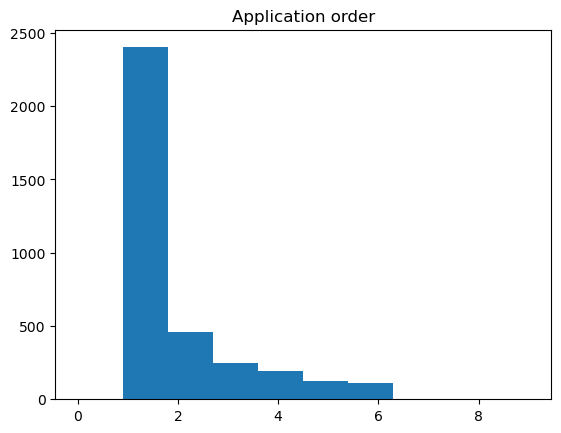

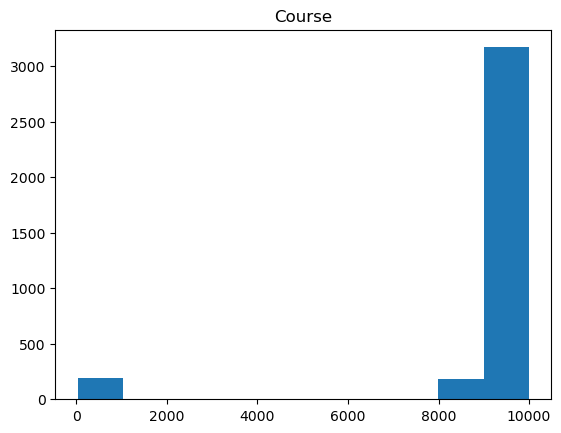

/Users/lingyundai/anaconda3/envs/classes/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


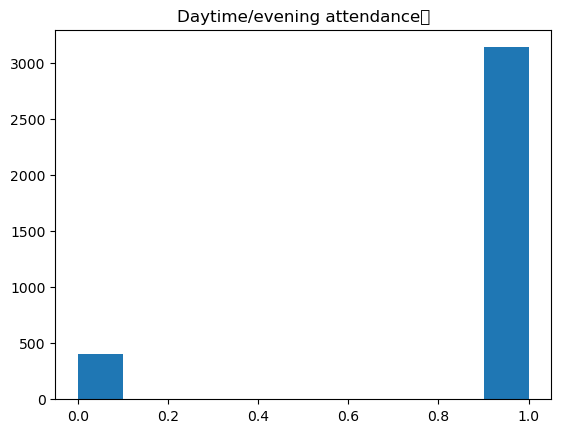

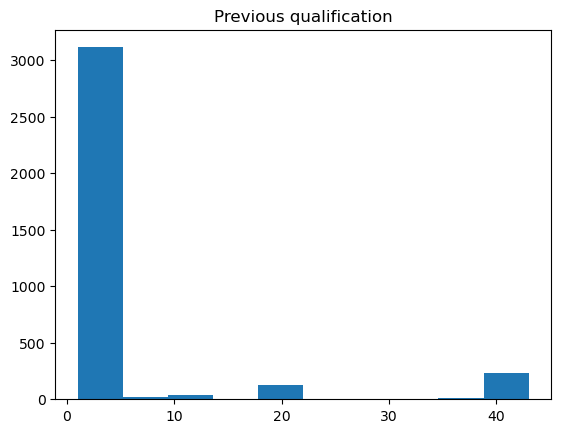

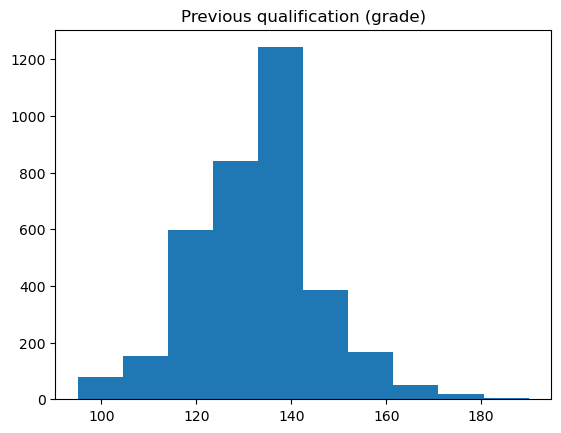

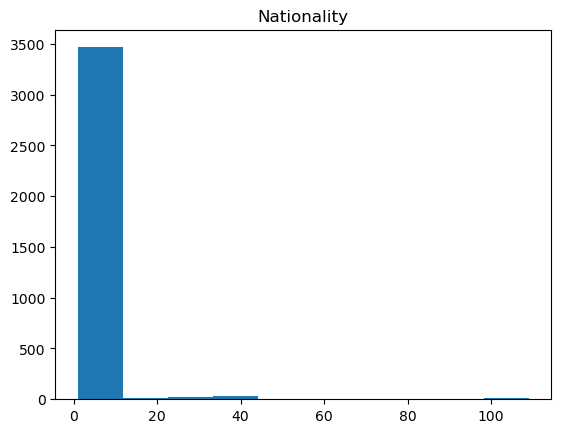

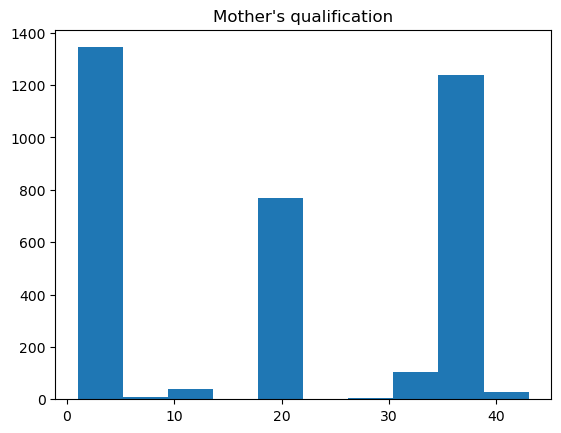

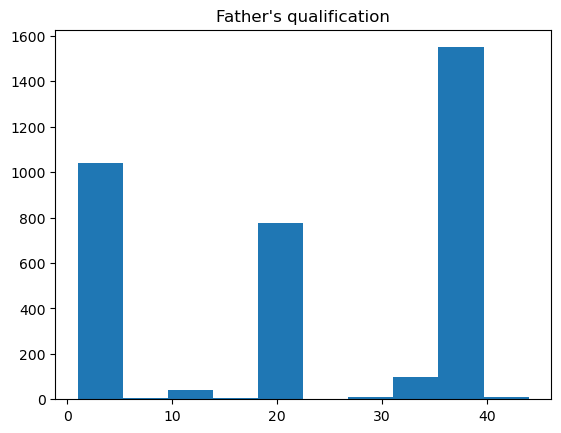

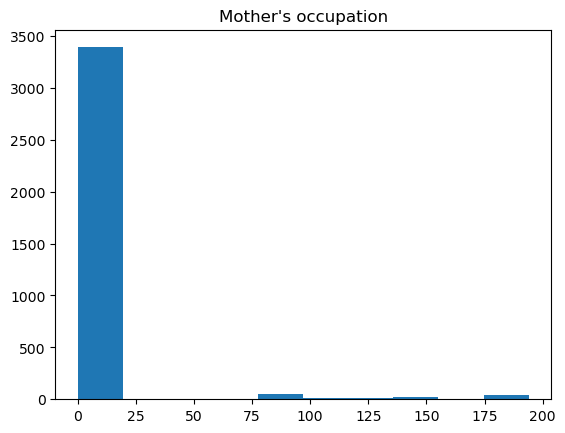

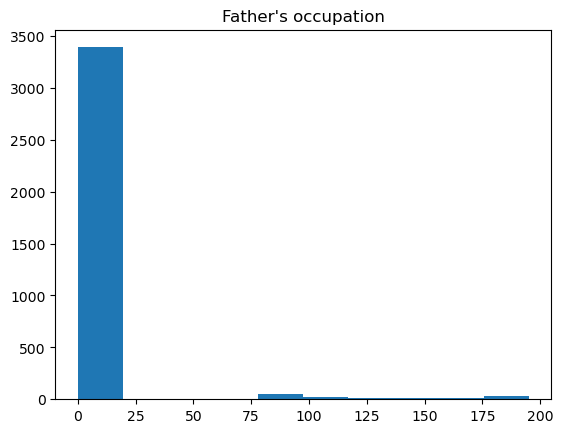

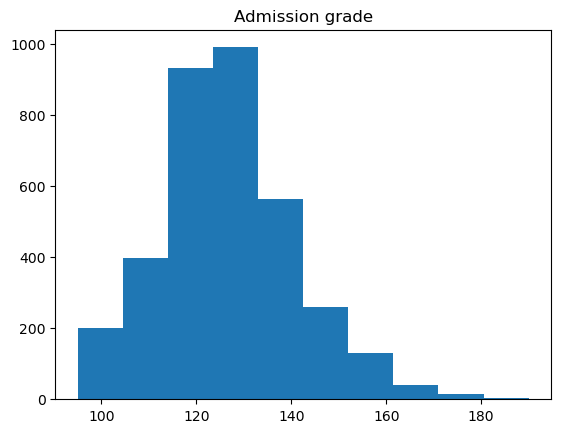

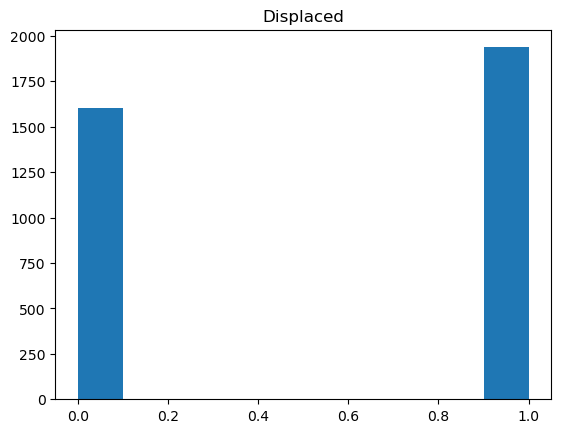

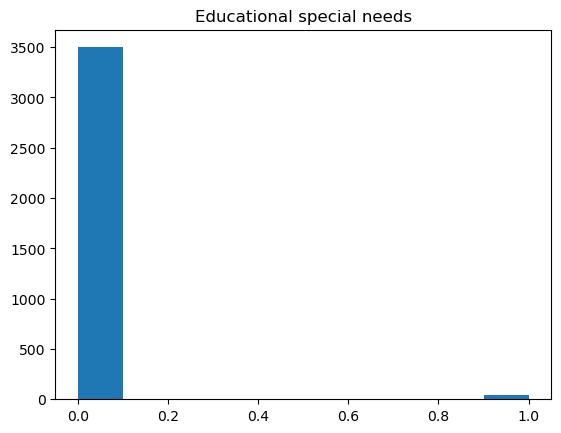

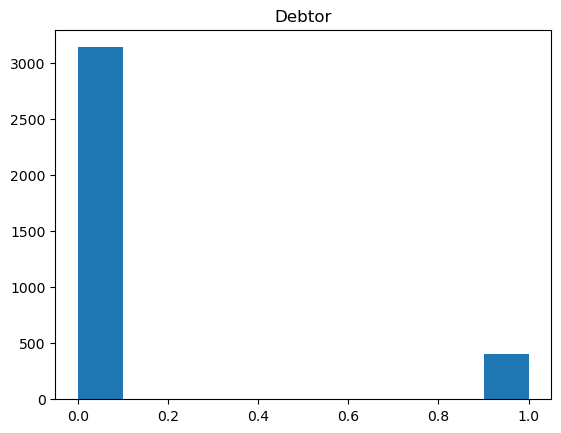

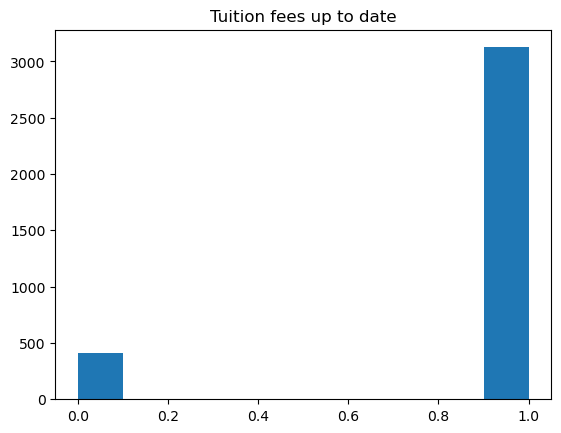

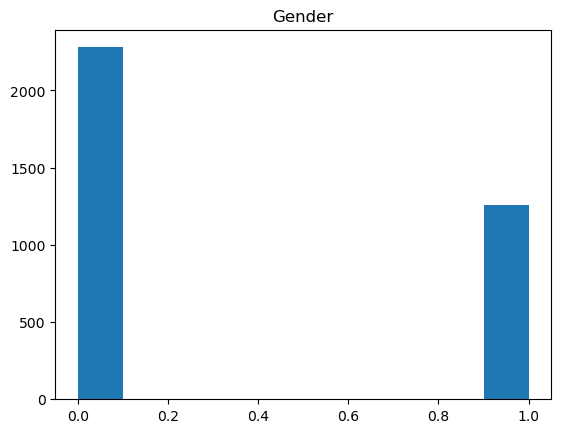

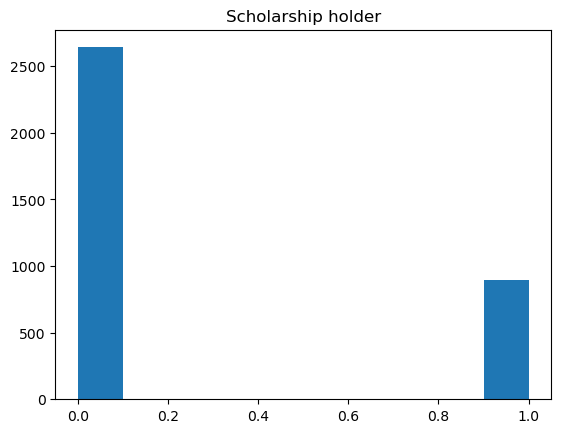

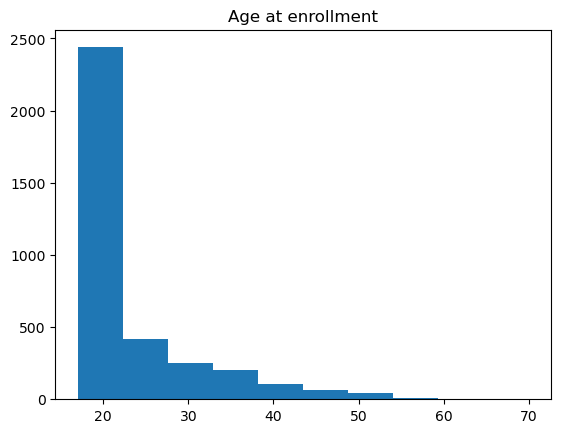

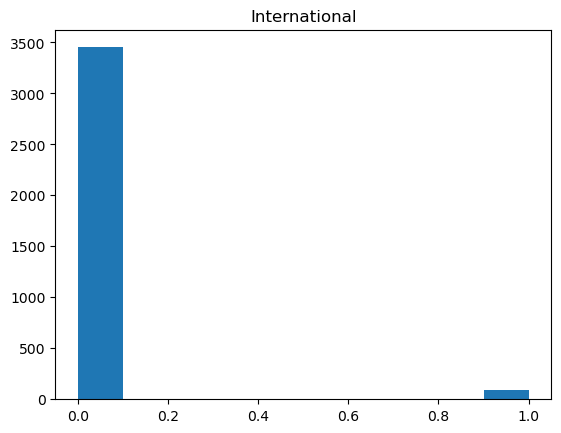

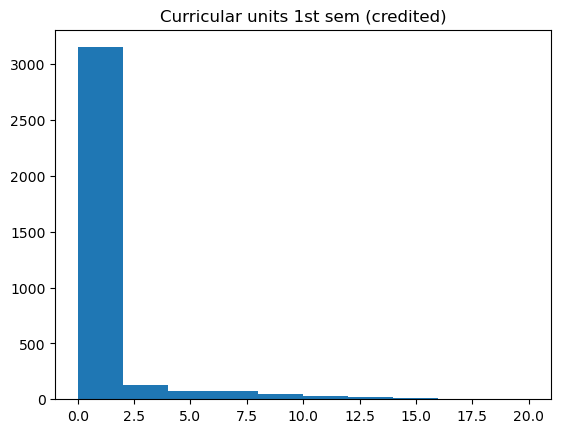

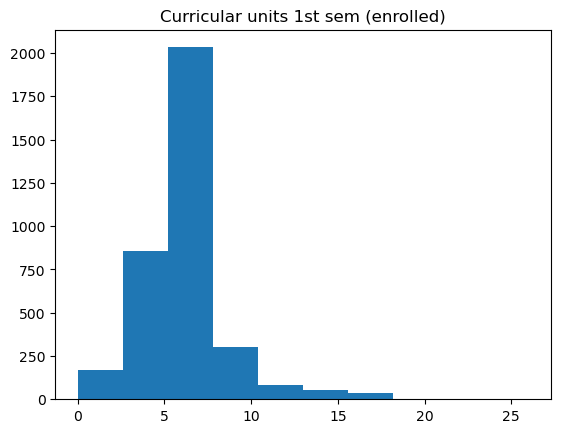

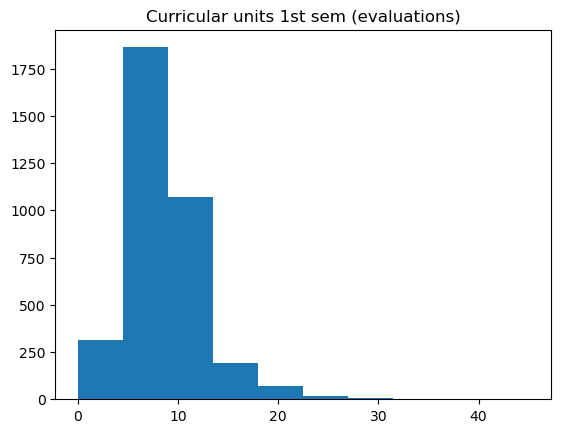

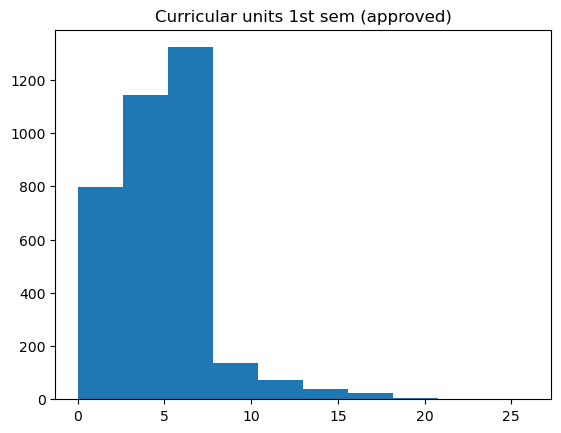

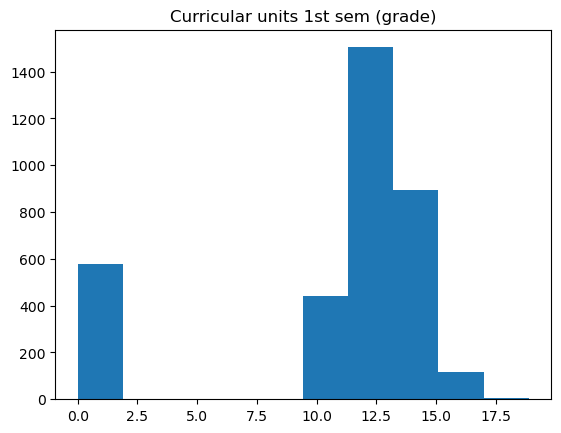

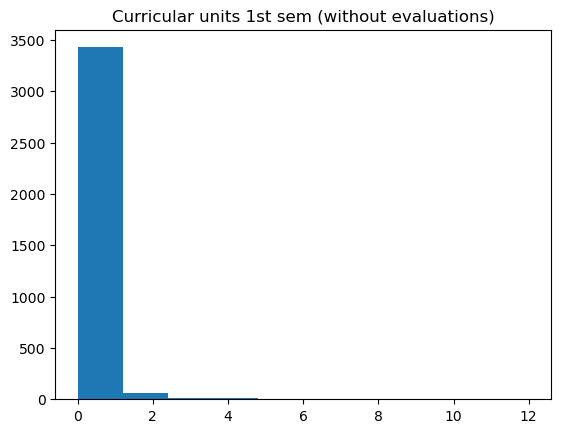

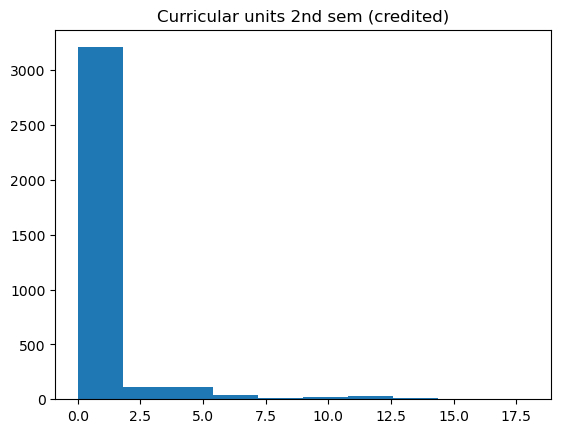

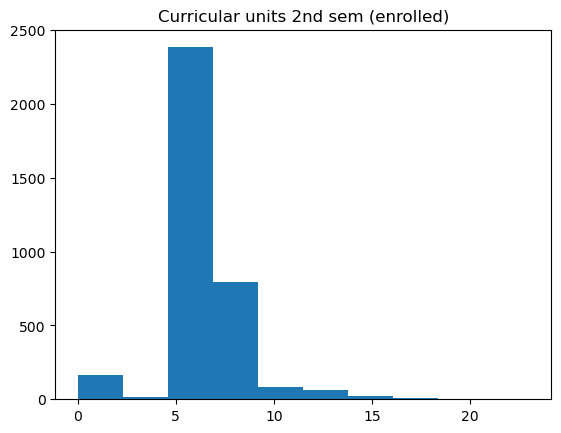

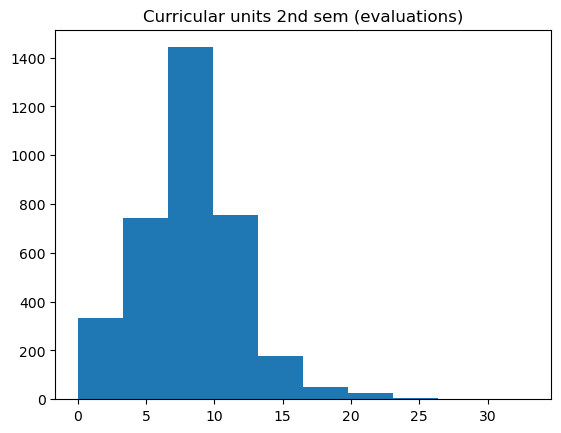

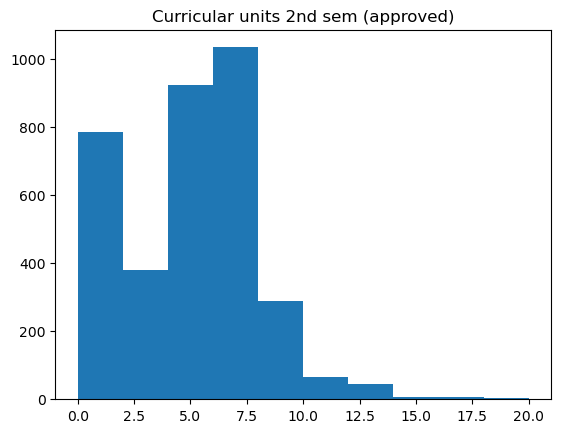

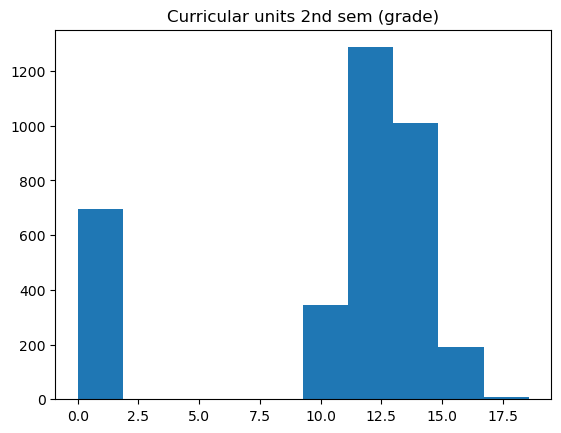

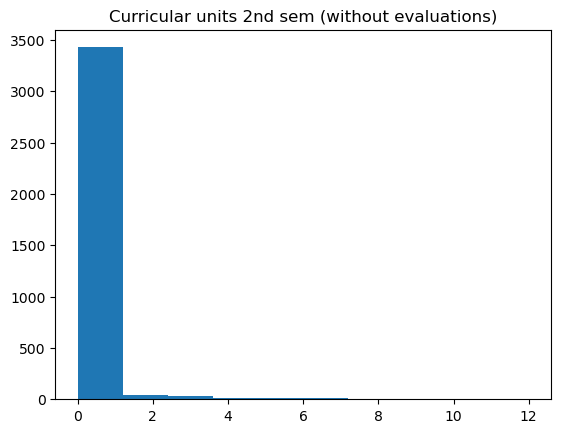

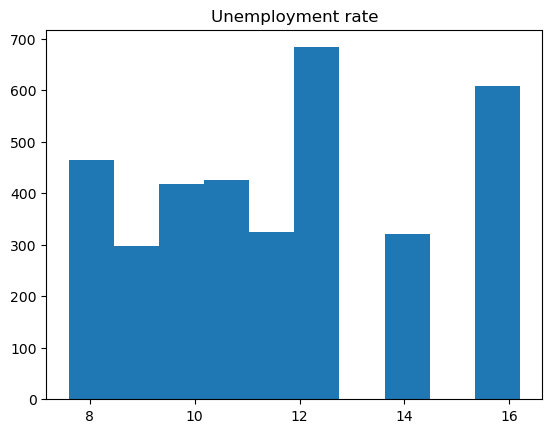

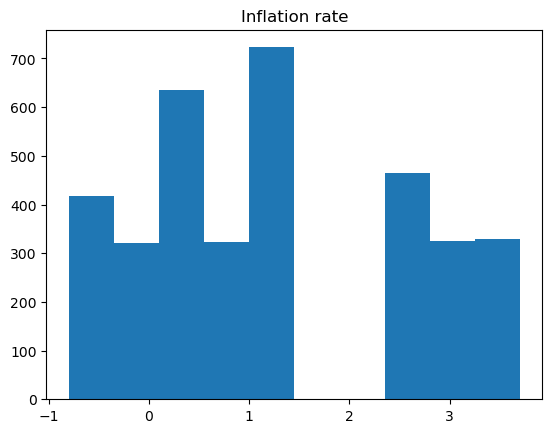

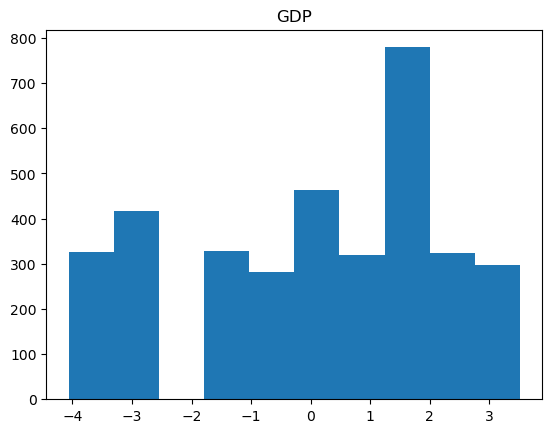

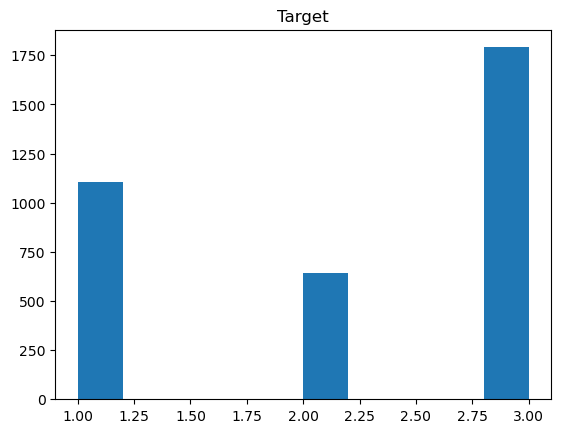

In [10]:
# check total columns
attributes = student_training_data.columns
# see distribution of each column
for c in attributes:
    plt.hist(student_training_data[c])
    plt.title(c)
    plt.show()

In [11]:
# split independent variables and dependent variable in training set
# exclude last column/target variable in X
X_train = student_training_data.loc[:, 'Marital status' : 'GDP']
X_train

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,4.0,7.0,1.0,9147.0,1.0,3.0,130.0,1.0,19.0,1.0,...,0.0,0.0,5.0,5.0,0.0,0.000000,0.0,11.1,0.6,2.02
1,1.0,39.0,1.0,9085.0,1.0,1.0,130.0,1.0,37.0,37.0,...,0.0,0.0,6.0,14.0,2.0,11.333333,0.0,11.1,0.6,2.02
2,1.0,1.0,6.0,9070.0,1.0,6.0,119.0,1.0,1.0,1.0,...,0.0,0.0,6.0,8.0,6.0,13.625000,0.0,10.8,1.4,1.74
3,2.0,39.0,1.0,9238.0,1.0,19.0,133.1,1.0,37.0,37.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,15.5,2.8,-4.06
4,1.0,1.0,3.0,9500.0,1.0,1.0,142.0,1.0,37.0,38.0,...,0.0,0.0,7.0,7.0,6.0,13.900000,0.0,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,1.0,1.0,2.0,9070.0,1.0,1.0,134.0,1.0,1.0,19.0,...,1.0,0.0,6.0,11.0,4.0,11.333333,0.0,13.9,-0.3,0.79
3535,1.0,1.0,1.0,9853.0,1.0,1.0,133.0,1.0,1.0,38.0,...,0.0,4.0,8.0,8.0,8.0,12.625000,0.0,15.5,2.8,-4.06
3536,1.0,1.0,1.0,8014.0,0.0,1.0,100.0,1.0,38.0,19.0,...,0.0,0.0,6.0,6.0,6.0,12.500000,0.0,12.7,3.7,-1.70
3537,1.0,1.0,4.0,9238.0,1.0,1.0,127.0,1.0,1.0,38.0,...,0.0,0.0,6.0,7.0,6.0,13.428571,0.0,11.1,0.6,2.02


In [12]:
# split independent variables and dependent variable in training set
# only include target in Y but make them integer
Y_train = student_training_data.loc[:, ['Target']].apply(np.int64)
Y_train

,Target
0,1
1,2
2,3
3,1
4,3
...,...
3534,1
3535,2
3536,3
3537,3


In [13]:
# perform standard normalization for training set because data points are on different scales
scaler = StandardScaler()
scaled_student_training_data=scaler.fit(X_train).transform(X_train)
scaled_student_training_data

array([[ 4.76915307, -0.67347927, -0.55749616, ..., -0.17355626,
        -0.46134859,  0.88478423],
       [-0.29476314,  1.16157067, -0.55749616, ..., -0.17355626,
        -0.46134859,  0.88478423],
       [-0.29476314, -1.01755114,  3.23669405, ..., -0.28596761,
         0.11873318,  0.76159704],
       ...,
       [-0.29476314, -1.01755114, -0.55749616, ...,  0.42597092,
         1.7864683 , -0.75184569],
       [-0.29476314, -1.01755114,  1.71901797, ..., -0.17355626,
        -0.46134859,  0.88478423],
       [-0.29476314, -0.04268086,  0.20134188, ...,  0.87561631,
        -1.1139406 ,  0.34364047]])

In [14]:
# perform standard normalization for test set because data points are on different scales
scaler = StandardScaler()
scaled_student_test_data=scaler.fit(student_test_data).transform(student_test_data)
scaled_student_test_data

array([[ 4.27845344,  1.168515  , -0.54034323, ..., -0.18087389,
        -0.42639968,  0.90672117],
       [-0.29637293, -0.07749995, -0.54034323, ...,  1.74908904,
        -0.64134009, -0.39630709],
       [-0.29637293, -0.07749995, -0.54034323, ...,  1.74908904,
        -0.64134009, -0.39630709],
       ...,
       [-0.29637293, -0.07749995, -0.54034323, ...,  0.31107744,
        -0.49804648,  0.80478359],
       [-0.29637293, -0.98369265,  0.23095315, ..., -0.18087389,
        -0.42639968,  0.90672117],
       [-0.29637293, -0.98369265,  1.77354591, ..., -0.29440113,
         0.14677475,  0.78262324]])

In [15]:
# check the scale of the training set before doing PCA
scaled_student_training_data.shape

(3539, 36)

In [16]:
# check the scale of the test set before doing PCA
scaled_student_test_data.shape

(885, 36)

In [17]:
# reduce training set dimension by applying PCA
# pick 5 principle components 
pca = PCA(n_components=5)
# fit PCA on scaled student training data
pca.fit(scaled_student_training_data)
# apply dimension reduction
pca.transform(scaled_student_training_data)

array([[-2.90423698,  2.6054007 , -0.15169329, -0.63596733, -0.41059367],
       [ 0.42738548,  0.5396026 , -1.30431818, -0.71928355,  0.23515838],
       [ 0.05526374, -2.35898601,  0.26522708,  0.43301405,  1.29662111],
       ...,
       [ 0.18548095, -0.07043113, -1.79027304, -1.66450075,  0.20277644],
       [ 0.14915186, -2.72358819, -0.84430752, -0.28628878,  0.56187489],
       [-0.56268262, -1.45597409,  1.0346639 ,  0.21839963,  0.09344421]])

In [18]:
# reduce test set dimension by applying PCA
# pick 5 principle components 
pca = PCA(n_components=5)
# fit PCA on scaled student training data
pca.fit(scaled_student_test_data)
# apply dimension reduction
pca.transform(scaled_student_test_data)

array([[-1.26015422,  1.37535444,  0.32187607, -0.48331604,  0.30511427],
       [-0.00920695, -0.86815473, -1.23760044, -0.2062937 , -0.12240161],
       [ 0.63563924, -0.40341594,  0.44809484, -0.95500579, -0.63973566],
       ...,
       [-0.16601527, -0.86798297,  0.43355533, -0.45191415, -0.05541124],
       [ 0.9676705 , -2.22152367,  0.6706201 , -0.09910927,  0.36296697],
       [ 1.01238337, -2.06582237,  1.13141429, -0.47103747,  0.43995021]])

In [19]:
# remove features with low variance in training set
sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
sel.fit_transform(scaled_student_training_data)

array([[ 4.76915307, -0.67347927, -0.55749616, ..., -0.17355626,
        -0.46134859,  0.88478423],
       [-0.29476314,  1.16157067, -0.55749616, ..., -0.17355626,
        -0.46134859,  0.88478423],
       [-0.29476314, -1.01755114,  3.23669405, ..., -0.28596761,
         0.11873318,  0.76159704],
       ...,
       [-0.29476314, -1.01755114, -0.55749616, ...,  0.42597092,
         1.7864683 , -0.75184569],
       [-0.29476314, -1.01755114,  1.71901797, ..., -0.17355626,
        -0.46134859,  0.88478423],
       [-0.29476314, -0.04268086,  0.20134188, ...,  0.87561631,
        -1.1139406 ,  0.34364047]])

In [20]:
# remove features with low variance
sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
sel.fit_transform(scaled_student_test_data)

array([[ 4.27845344,  1.168515  , -0.54034323, ..., -0.18087389,
        -0.42639968,  0.90672117],
       [-0.29637293, -0.07749995, -0.54034323, ...,  1.74908904,
        -0.64134009, -0.39630709],
       [-0.29637293, -0.07749995, -0.54034323, ...,  1.74908904,
        -0.64134009, -0.39630709],
       ...,
       [-0.29637293, -0.07749995, -0.54034323, ...,  0.31107744,
        -0.49804648,  0.80478359],
       [-0.29637293, -0.98369265,  0.23095315, ..., -0.18087389,
        -0.42639968,  0.90672117],
       [-0.29637293, -0.98369265,  1.77354591, ..., -0.29440113,
         0.14677475,  0.78262324]])

In [21]:
# apply knn algorithm
# calculate distances between each test data query and all training data queries
# use hashmaps to match row indices and get majority votes for quick insertion and lookup
class NearestNeighbor:
    def __init__(self, k):
        self.k = k
    
    def knn(self, trainingData, testDataQuery, yTrain):
        totalDistanceArr = []
        count = {}
        targets = []
        # iterate thru each array in training data with row index and row array
        for rowIndex, trainRow in enumerate(trainingData.tolist()):
            # reset total distance every time we go to a new training set array
            totalDistance = 0
            # for each index, value in current array in training set
            for valIndex, value in enumerate(trainRow):
                # total distance is the sum of the subtractions of corresponding indices 
                # values in training array and test array
                totalDistance += np.square(value - testDataQuery[valIndex])
            # use hashmap to map the calculated euclidean distance 
            # to the row index in the training set
            count[float(np.sqrt(totalDistance))] = rowIndex
            # append the distances to a distance array
            totalDistanceArr.append(float(np.sqrt(totalDistance)))
            # sort distance array
            totalDistanceArr.sort()
        
        # get k number of distances from total distance array
        kDistance = totalDistanceArr[:self.k+1]
        
        # find the corresponding training set row based on the k number of distances
        for dist in kDistance:
            # append the indices to targets array
            targets.append(count[dist])
        
        # find the corresponding targets of the indices in y_train
        labels = [yTrain[i] for i in targets]
        # hashmap to count target amounts
        countLabels = {}
        for l in labels:
            countLabels[l] = 1 + countLabels.get(l, 0)
            # max value's key in hashmap is majority vote label
            maxLabel = max(countLabels, key=countLabels.get)
        return maxLabel
    
# tiny dataset for testing the algorithm
# trainingDataQuery = np.array([[6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [1, 2, 3, 4, 5]])
# # testDataQuery = np.array([[2, 3, 4, 5, 6], [7, 8, 9, 10, 11]])
# print(obj.knn(trainingDataQuery, [1, 1, 1, 1, 1], ["a", "b", "c", "d", "e"]))
# obj = NearestNeighbor(k=5)
# counter = 0
# for testRow in scaled_student_test_data.tolist():
#     counter += 1
#     print(obj.knn(scaled_student_training_data, testRow, Y_train.to_numpy().flatten()))
#     print(counter)

In [22]:
# apply k fold cross validation
# merge corresponding scaled training X with training Y
# apply k fold cross validation 
class kFoldCrossValidation:
    def __init__(self, k):
        self.k = k
        
    def mergeScaledXWithY(self, scaledTrainingX, trainingY):
        mergedArr = []
        Y_trainNp = Y_train.to_numpy()
        # combine scaled training X with training Y
        for i in range(len(scaled_student_training_data.tolist())):
            # append target value to corresponding scaled training data
            new = np.append(scaled_student_training_data[i], Y_trainNp[i])
            # append to a merged array
            mergedArr.append(new)
        #     print("merged arr, ", mergedArr)
        return mergedArr
    
    def applyKFold(self, mergedArr):
        # shuffle dataset every time before splitting
        np.random.shuffle(mergedArr)
        # split array into k parts
        splitArr = np.array_split(mergedArr, self.k)
        # k - 1 folds are training folds, concatenate arrays into one array
        trainingFolds = np.concatenate(splitArr[:self.k-1])
        # rest is test fold, concatenate arrays into one array
        testFolds = np.concatenate(splitArr[self.k-1:])

        # split independent variables and dependent variable for training sets
        trainingFoldsX = []
        trainingFoldsY = []
        for fold in trainingFolds:
            # everything but the last value
            trainingFoldsX.append(fold[:len(fold) - 1])
            # last value/target
            trainingFoldsY.append(fold[len(fold) - 1:])
        # convert trainingFoldsX to numpy array to suit algorithm
        trainingFoldsXNp = np.array(trainingFoldsX)
        # convert trainingFoldsY to dataframe to suit algorithm
        trainingFoldsYDf = pd.DataFrame(trainingFoldsY)

        # split independent variables and dependent variable for test set
        testingFoldsX = []
        testingFoldsY = []
        for fold in testFolds:
            testingFoldsX.append(fold[:len(fold) - 1])
            testingFoldsY.append(fold[len(fold) - 1:])
        
        # call knn alogorithm, assign k
        obj = NearestNeighbor(k=13)
        # classification results
        classificationRes = []
        # get majority votes for each test data query
        for testRow in testingFoldsX:
            # append the classification results
            classificationRes.append(obj.knn(trainingFoldsXNp, testRow, trainingFoldsYDf.to_numpy().flatten()))

        correctRes = 0
        # find out how many classifications are correct
        for i in range(len(testingFoldsY)):
            if int(testingFoldsY[i][0]) == classificationRes[i]:
                correctRes += 1
            # calculate the accuracy
            accuracy = correctRes / len(testingFoldsY)
        print("accuracy: ", accuracy)
        return accuracy

# # tiny data set for testing purpose
# mockScaledTrainingX = np.array([[0.1, 0.2, 0.3, 0.4, 0.5],
#                                 [0.6, 0.7, 0.8, 0.9, 1.0],
#                                 [1.1, 1.2, 1.3, 1.4, 1.5],
#                                 [1.6, 1.7, 1.8, 1.9, 2.0],
#                                 [2.1, 2.2, 2.3, 2.4, 2.5],
#                                 [2.6, 2.7, 2.8, 2.9, 3.0]])
# mockTrainingY = np.array([[1],[3],[2],[1],[3],[2]])

In [23]:
# calculate average accuracy after performing k-fold cross validation k times, assign k
obj = kFoldCrossValidation(k=5)
# get merged array
mergedArr = obj.mergeScaledXWithY(scaled_student_training_data, Y_train)

# calculate accuracy k times
totalAccuracy = 0
for i in range(1, obj.k+1):
    totalAccuracy += obj.applyKFold(mergedArr)
    # get the final average accuracy
avgAccuracy = totalAccuracy / obj.k
print("avg accuracy: ", avgAccuracy)

# the cross validation result is around 0.70

accuracy:  0.7128712871287128
accuracy:  0.6775106082036775
accuracy:  0.7227722772277227
accuracy:  0.6987270155586988
accuracy:  0.7057991513437057
avg accuracy:  0.7035360678925036


In [24]:
# apply knn algorithm on provided test set after cross validation
obj = NearestNeighbor(k=13)
for testRow in scaled_student_test_data.tolist():
    print(obj.knn(scaled_student_training_data, testRow, Y_train.to_numpy().flatten()))

1
3
3
3
1
3
3
1
3
3
3
3
3
3
3
2
3
3
3
3
3
1
1
3
3
3
1
3
3
1
3
1
1
1
1
3
3
3
3
3
1
1
3
1
1
3
3
3
3
3
3
3
1
1
2
3
3
3
3
3
1
3
3
3
3
3
3
3
3
1
3
3
1
3
3
3
3
2
3
3
1
3
3
3
3
2
3
3
3
3
1
3
3
3
2
3
1
3
1
1
3
3
3
1
2
2
3
1
2
3
1
3
3
3
3
3
3
3
3
1
3
1
1
3
2
1
3
1
3
3
3
3
3
3
3
3
1
3
1
3
2
1
3
3
3
3
3
3
1
3
3
1
2
3
1
3
3
3
1
3
3
3
3
3
3
3
1
2
3
1
3
1
3
3
1
3
2
1
3
3
1
3
1
1
3
1
1
3
3
1
3
3
1
1
3
1
3
3
1
3
1
3
3
3
3
1
3
3
3
3
3
1
3
3
3
3
3
1
1
3
3
3
1
3
1
3
3
1
1
3
3
1
2
1
3
3
1
3
3
3
3
1
1
3
3
1
2
1
3
2
3
3
3
3
3
3
1
3
3
2
3
2
3
1
3
3
3
3
3
1
1
2
1
3
3
3
2
2
3
3
3
3
3
1
1
3
3
2
3
1
1
3
1
3
3
3
3
3
1
3
3
3
2
3
1
3
3
3
3
3
3
1
3
3
3
3
3
3
3
2
3
1
3
1
2
3
1
2
3
3
3
1
3
1
3
3
2
1
3
3
3
2
1
3
1
1
3
3
1
3
3
1
2
3
2
1
1
3
1
3
3
3
3
1
3
1
3
3
3
1
3
3
1
3
1
3
3
1
1
1
3
3
1
3
1
3
3
3
3
1
3
1
3
3
3
1
3
1
2
3
3
1
1
3
3
3
3
3
3
3
3
1
2
3
3
2
3
3
3
3
1
1
3
3
3
3
1
1
3
2
1
3
1
3
3
1
3
3
3
3
3
1
3
3
3
3
3
1
3
3
3
2
3
3
3
3
3
1
3
1
3
3
3
3
3
3
1
3
1
3
1
3
3
3
3
3
3
3
3
3
1
3
3
1
1
1
1
1
3
3
2
3
3
3
3
3
3
1
3
3


SyntaxError: invalid syntax (3867327222.py, line 1)